In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

Total variation and bilateral algorithms typically produce “posterized” images with flat domains separated by sharp edges. It is possible to change the degree of posterization by controlling the tradeoff between denoising and faithfulness to the original image.

In [2]:
image_set = []

In [3]:
noisy_set = []

In [9]:
img = cv2.imread('/5.jpg')
image_set.append(img)
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
img_gauss = cv2.add(img,gauss)
noisy_set.append(img_gauss)

                                                        Method - 1

**Total variation filter**

The result of this filter is an image that has a minimal total variation norm, while being as close to the initial image as possible. The total variation is the L1 norm of the gradient of the image.


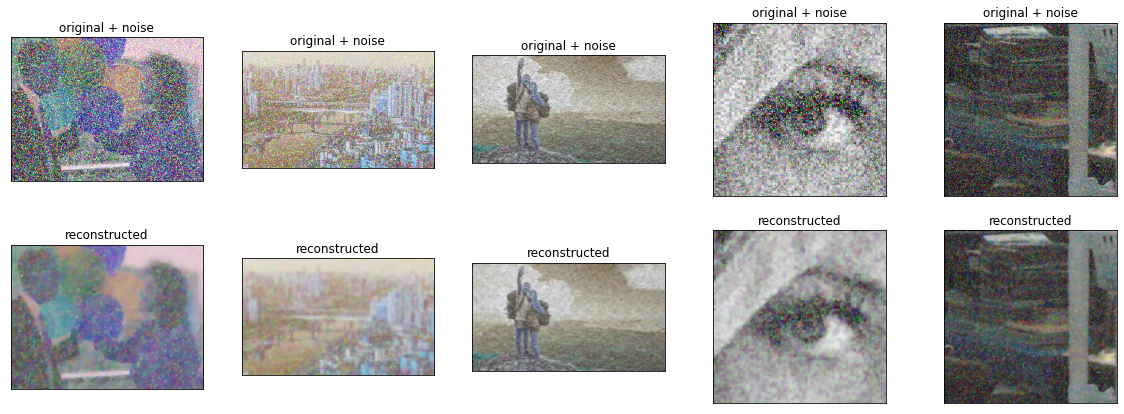

In [12]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(noisy_set[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  bx = plt.subplot(2, n, i + n + 1) 
  plt.title("reconstructed") 
  y = denoise_tv_chambolle(noisy_set[i], weight=0.2, multichannel=True)
  plt.imshow(tf.squeeze(y)) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
plt.show()

                                                      Method - 2
**Wavelet denoising filter**

A wavelet denoising filter relies on the wavelet representation of the image. The noise is represented by small values in the wavelet domain which are set to 0.                          

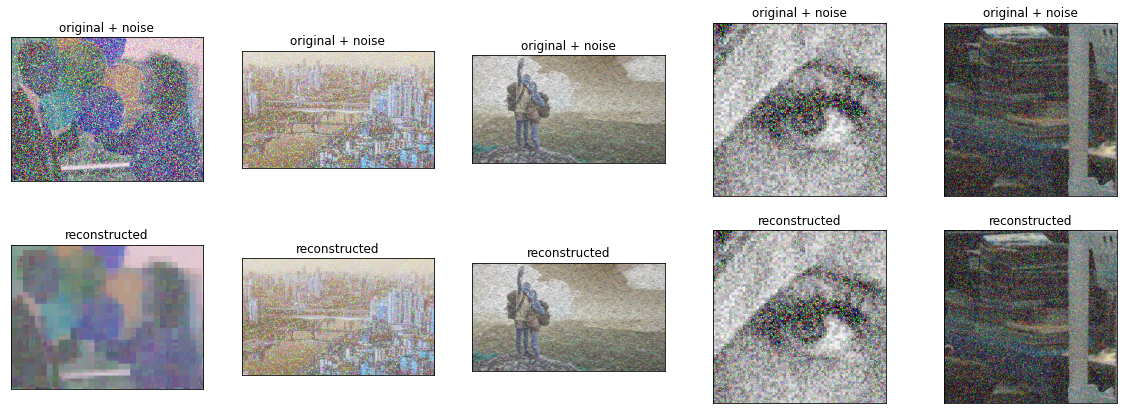

In [13]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(noisy_set[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  bx = plt.subplot(2, n, i + n + 1) 
  plt.title("reconstructed") 
  y = denoise_wavelet(noisy_set[i], multichannel=True, rescale_sigma=True)
  plt.imshow(tf.squeeze(y)) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
plt.show()

                                                        Method - 3
 
**Bilateral filter**

A bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.
                                                       

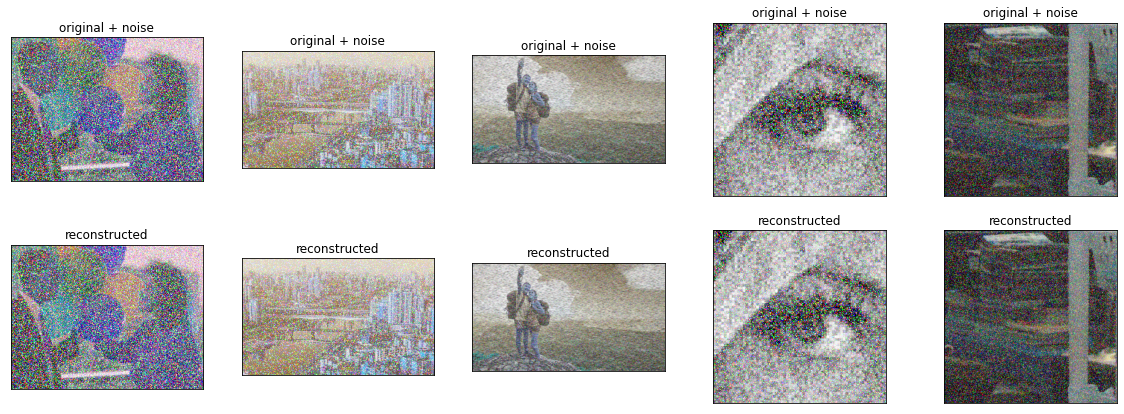

In [15]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(noisy_set[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  bx = plt.subplot(2, n, i + n + 1) 
  plt.title("reconstructed") 
  y = denoise_bilateral(noisy_set[i], sigma_color=0.05, sigma_spatial=15,multichannel=True)
  plt.imshow(tf.squeeze(y)) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
plt.show()